# Who Gets Paid More? 
This project explores how age, education, and work hours influence income. Using the UCI Census Dataset to build a model that predicts whether someone earns more than $50K per year.

In [27]:
#Loading and exploring the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv(r'/Users/dhairya/Downloads/adult.csv')

print(df.head())
df.info()
df.describe(include='all')

df_raw = df.copy()



   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

Clean the Data 🧼
We fix missing values and clean text columns.

In [50]:
# Data Cleaning

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
    'income'
]

df_clean=pd.read_csv(r'/Users/dhairya/Downloads/adult.csv', names=column_names, header=None)

print(df_clean.columns)

print("Missing values per column:\n")
print(df_clean.isnull().sum()) 

for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.lower()

df_clean.drop_duplicates(inplace=True)
df_clean.replace('?', pd.NA, inplace=True)
df_clean['income'] = df_clean['income'].apply(lambda x: 1 if x == '>50k' else 0)

# Final check
print("\n df_clean shape after cleaning:", df_clean.shape)
df_clean.head()



Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
Missing values per column:

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

 df_clean shape after cleaning: (32537, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,0


# Exploratory Data Analysis 
Visualizing relationships between income and variables like education, age, gender, etc.


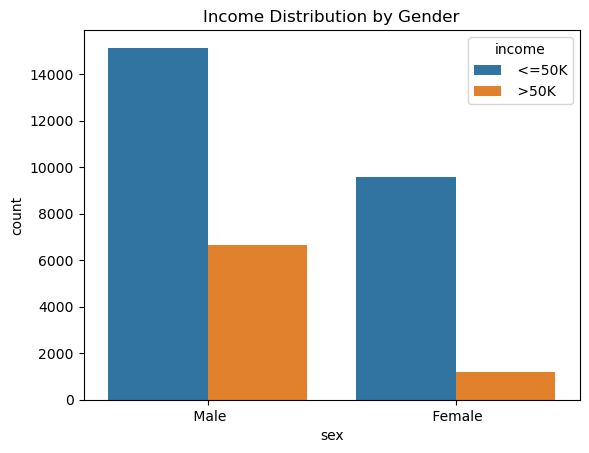

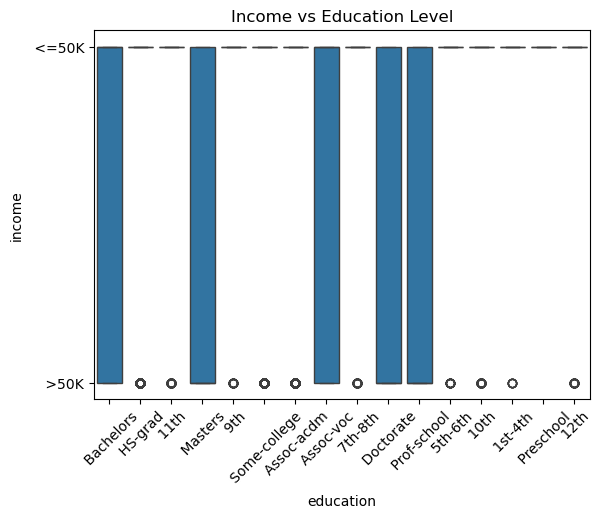

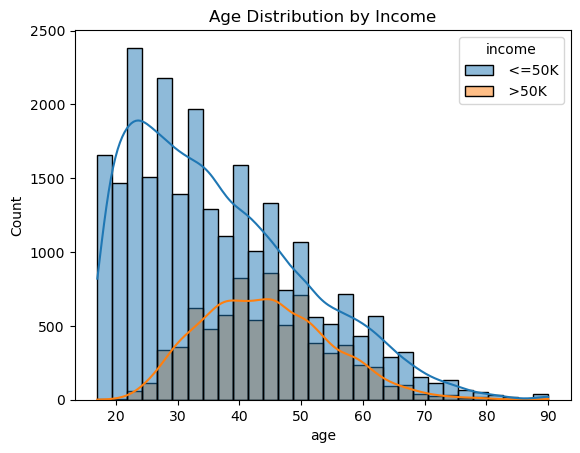

In [73]:
# EDA - key visuals

# Income by gender
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.show()

# Education level vs income
sns.boxplot(data=df, x='education', y='income')
plt.xticks(rotation=45)
plt.title('Income vs Education Level')
plt.show()

# Age vs income
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True)
plt.title('Age Distribution by Income')
plt.show()


# SQL Procedure
To explore how education and gender relate to income levels, we saved the cleaned dataset to a SQLite database and queried it using SQL, helping to answer questions like:

- Which education level leads to higher income for men vs women?
- Are certain groups underrepresented among high-income earners?

In [51]:
import sqlite3
import os

os.makedirs('data', exist_ok=True)
conn = sqlite3.connect('data/income.db')

df_clean.to_sql('income_data', conn, if_exists='replace', index=False)

# SQL query
query = """
SELECT 
    sex, 
    education, 
    COUNT(*) AS total_count,
    ROUND(AVG(income) * 100.0, 2) AS percent_high_income
FROM income_data
GROUP BY sex, education
ORDER BY percent_high_income DESC;
"""

result = pd.read_sql(query, conn)
result


,sex,education,total_count,percent_high_income
0,male,prof-school,484,78.72
1,male,doctorate,327,78.29
2,male,masters,1186,65.77
3,female,doctorate,86,58.14
4,male,bachelors,3735,50.39
5,female,prof-school,92,45.65
6,female,masters,536,33.40
7,male,assoc-voc,882,33.33
8,male,assoc-acdm,646,32.35
9,male,some-college,4480,26.54


# Preprocessing

Encoding all categorical variables into numeric format using one-hot encoding, to prepare data for machine learning models. This allows machine learning algorithm to learn patterns from specific demographic categories.

In [54]:

df_model = df_clean.copy()

categorical_columns = ['sex', 'education', 'occupation', 'marital_status', 
                       'relationship', 'native_country', 'workclass', 'race']

# One-hot encode the categorical columns
df_model = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

print("Encoded df_model shape:", df_model.shape)
df_model.head()


Encoded df_model shape: (32537, 98)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,sex_male,education_11th,education_12th,...,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,race_asian-pac-islander,race_black,race_other,race_white
0,39,77516,13,2174,0,40,0,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,50,83311,13,0,0,13,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,38,215646,9,0,0,40,0,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,53,234721,7,0,0,40,0,True,True,False,...,False,True,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,True,False,False,False,False,False,True,False,False


# Train the Model
Using a Random Forest Classifier to predict income. 

1. **Defined features (`X`) and target (`y`)**:
   - `X` includes all relevant features such as age, education, occupation, etc.
   - `y` is the income class (0 = <=50K, 1 = >50K)

2. **Split the dataset** into training and testing sets using an 80-20 ratio.

3. **Trained a Random Forest Classifier**:
   - A powerful ensemble learning algorithm
   - Built using 100 decision trees (n_estimators=100)
   - Capped tree depth to 10 to reduce overfitting

4. **Evaluated the model** using:
   - **Accuracy score**: Overall prediction correctness
   - **Classification report**: Includes precision, recall, and F1-score for each income class

This model provides a strong baseline for understanding which individuals are more likely to fall into the high-income group.

In [64]:
# Predictive Analysis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define X and y
X = df_model.drop('income', axis=1)
y = df_model['income']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the model 
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
preds = model.predict(X_test)

# Accuracy
print("Model Accuracy:", accuracy_score(y_test, preds))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, preds))



Model Accuracy: 0.8578672403196066

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4905
           1       0.81      0.55      0.66      1603

    accuracy                           0.86      6508
   macro avg       0.84      0.75      0.78      6508
weighted avg       0.85      0.86      0.85      6508



# Improving the Model – Optimizing Classification Threshold

By default, classification models like Random Forest use a threshold of **0.50** to decide whether a prediction falls into the positive class (in this case, earning >$50K). However, this default may not always provide the best balance between **precision** (how many predicted high earners are correct) and **recall** (how many actual high earners we correctly identify).

Actions performed:

1. **Extracted the predicted probabilities** for the positive class (income >$50K).
2. Calculated **precision**, **recall**, and the **F1 score** across different thresholds.
3. **Plotted the Precision-Recall curve** along with F1 scores to visualize the trade-offs.
4. Identified the **optimal threshold** that maximizes the F1 score — a metric that balances both precision and recall.

This approach helps handle **class imbalance** and ensures our model performs well not just overall, but specifically in **correctly identifying high-income individuals** — which is often the more valuable prediction in business settings.

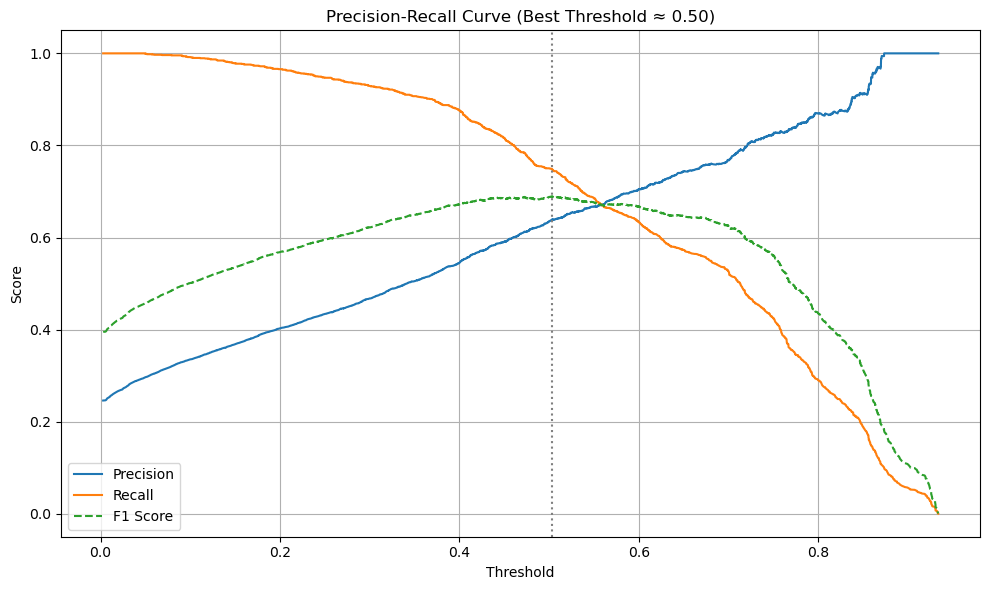

Optimal Threshold: 0.50
Best F1 Score: 0.69


In [69]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1
probs = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the best F1 score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', linestyle='--')
plt.axvline(x=best_threshold, color='gray', linestyle=':')
plt.title(f'Precision-Recall Curve (Best Threshold ≈ {best_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Output best threshold and F1 score
print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {f1_scores[best_index]:.2f}")


# Handling Class Imbalance with SMOTE + Final Model Evaluation

In real-world datasets, the number of high-income earners is often much smaller than the number of low-income earners. This creates **class imbalance**, which can bias the model toward predicting the majority class (<= $50K).

**SMOTE (Synthetic Minority Oversampling Technique)**:
- SMOTE generates synthetic examples of the minority class (>$50K)
- It balances the class distribution in the **training set only**
- This allows the model to learn equally from both income classes.

1. **Trained a new Random Forest model** on the SMOTE-balanced data.
2. **Evaluated model performance** using accuracy and the classification report.
3. **Visualized feature importance** to understand which variables influence predictions most.
4. **Displayed the confusion matrix** to assess how well the model distinguishes between the two income classes.

This process significantly improved the model’s **recall for high-income individuals**, making it more effective in identifying cases that would otherwise be missed in an imbalanced dataset.

In [80]:
# Improved Model with Optimized Threshold 0.50

from imblearn.over_sampling import SMOTE

X = df_model.drop('income', axis=1)
y = df_model['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE 
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_smote.value_counts())

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Save the exact feature names used during training
model_features = X_train.columns.tolist()

# Predict 
preds = model.predict(X_test)



After SMOTE: income
0    19793
1    19793
Name: count, dtype: int64



Model Accuracy (with SMOTE): 0.8326674861708666

Classification Report (with SMOTE):
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      4905
           1       0.64      0.75      0.69      1603

    accuracy                           0.83      6508
   macro avg       0.77      0.80      0.79      6508
weighted avg       0.84      0.83      0.84      6508



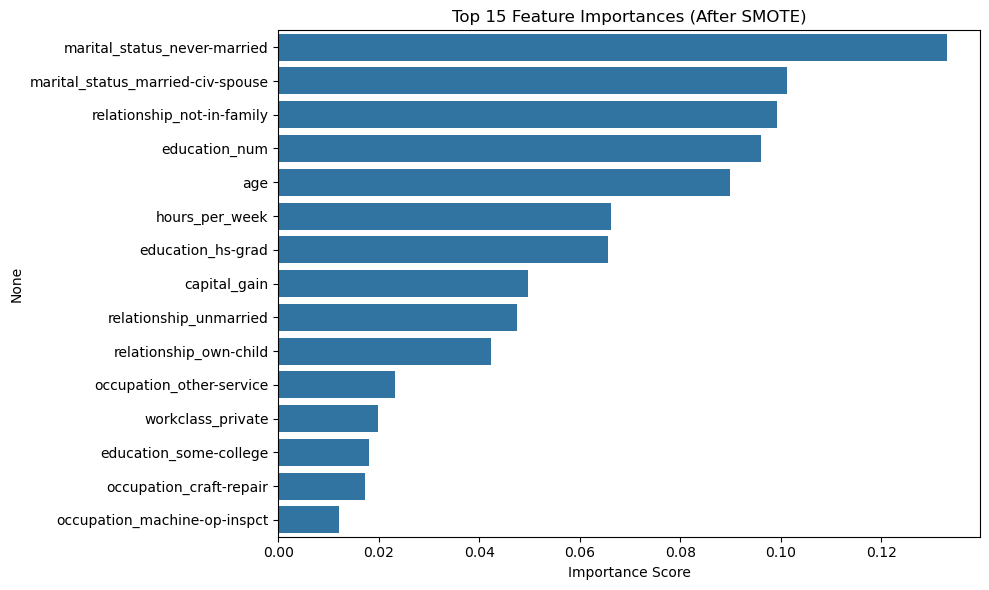

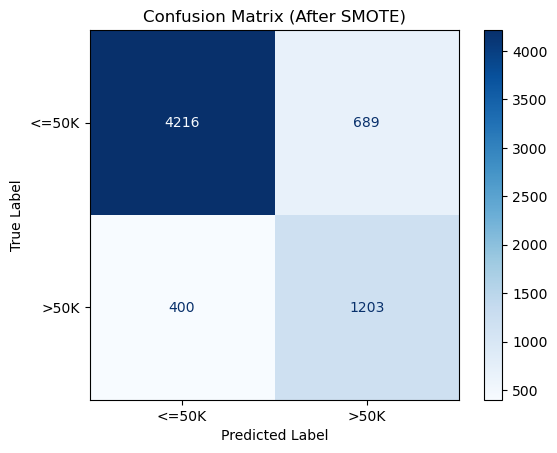

In [76]:
print("\nModel Accuracy (with SMOTE):", accuracy_score(y_test, preds))
print("\nClassification Report (with SMOTE):\n", classification_report(y_test, preds))

# Get and sort feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 15 Feature Importances (After SMOTE)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (After SMOTE)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [87]:
import pandas as pd
import numpy as np

def predict_income(model, model_features, user_input):
    """
    Predict whether a person earns >50K based on input dictionary.

    Parameters:
        model : trained model object
        model_features : list of feature names used during training
        user_input : dictionary with selected user features (e.g., age, education_bachelors)

    Returns:
        '>50K' or '<=50K'
    """
    # Create empty row with all zeros
    input_row = pd.DataFrame(data=np.zeros((1, len(model_features))), columns=model_features)

    # Fill in user values where provided
    for feature, value in user_input.items():
        if feature in input_row.columns:
            input_row.at[0, feature] = value

    # Make prediction
    prediction = model.predict(input_row)[0]
    return '>50K' if prediction == 1 else '<=50K'


In [89]:
import os
os.makedirs('models', exist_ok=True)

import pickle
with open('models/income_rf.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('models/model_features.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)


